In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
import calendar
%matplotlib inline

# Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­ minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
# Read in the data
df1 = pd.read_json('logins.json')
df1.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df1.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [4]:
# Initial check for data quality: No null values - good!
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# Resample in 15 minute time intervals
df1.set_index('login_time', inplace=True)
df1['count'] = 1
df1 = df1.resample('15T').sum()

df1.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


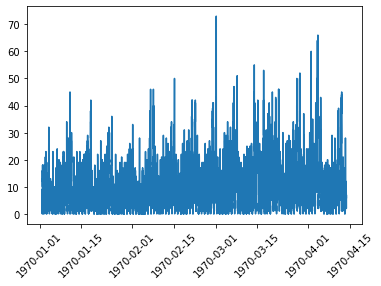

In [6]:
# Show the entire series
plt.plot(df1)
plt.xticks(rotation=45);

We can see an increase in logins near the beginning of March

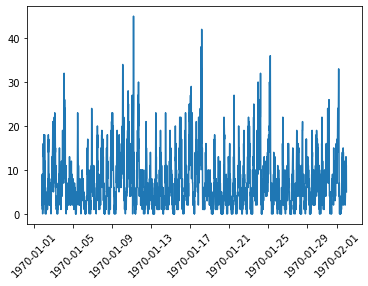

In [7]:
# Plot of the first month (january) of time series data
plt.plot(df1['1970-01-01': '1970-02-01'])
plt.xticks(rotation=45);

A more zoomed in look of January shows us that there an uptip in logins around the 10th and 17th

,Total,Percent
count,0,0.0


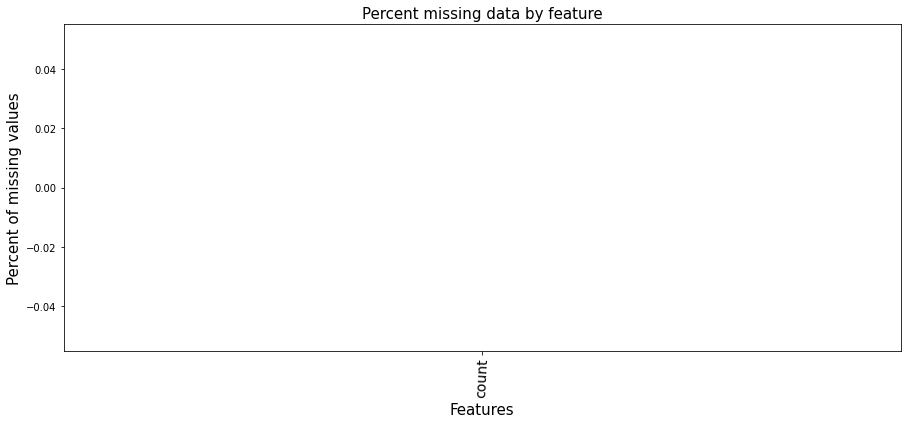

In [8]:
#check the null values 
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#show visual results of missing data
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='87', fontsize=14)
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

missing_data

In [9]:
# Exstract features from the dataset
df1['time'] = pd.to_datetime(df1.index)

In [10]:
df1['month'] = df1.time.dt.month
df1['day'] = df1.time.dt.day
df1['hour'] = df1.time.dt.hour
df1['week'] = df1.time.dt.week
df1['weekday'] = df1.time.dt.weekday

df1.head()

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,1,1,20,1,3
1970-01-01 20:15:00,6,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,9,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,7,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,1,1970-01-01 21:00:00,1,1,21,1,3


In [11]:
#aggregate Login count based on hour
df1_hourly= df1.copy()
df1_h = df1_hourly.resample('H').sum()
df1_h.head()

,count,month,day,hour,week,weekday
login_time,,,,,,
1970-01-01 20:00:00,24,4,4,80,4,12
1970-01-01 21:00:00,9,4,4,84,4,12
1970-01-01 22:00:00,21,4,4,88,4,12
1970-01-01 23:00:00,58,4,4,92,4,12
1970-01-02 00:00:00,53,4,8,0,4,16


In [12]:
#aggregate Login count based on day
df1_day= df1.copy()
df1_d = df1_day.resample('D').sum()
df1_d.head()

,count,month,day,hour,week,weekday
login_time,,,,,,
1970-01-01,112,16,16,344,16,48
1970-01-02,681,96,192,1104,96,384
1970-01-03,793,96,288,1104,96,480
1970-01-04,788,96,384,1104,96,576
1970-01-05,459,96,480,1104,192,0


In [13]:
#aggregate Login count based on week
df1_week= df1.copy()
df1_w = df1_week.resample('W').sum()
df1_w.head()

,count,month,day,hour,week,weekday
login_time,,,,,,
1970-01-04,2374,304,880,3656,304,1488
1970-01-11,5217,672,5376,7728,1344,2016
1970-01-18,5023,672,10080,7728,2016,2016
1970-01-25,4751,672,14784,7728,2688,2016
1970-02-01,4744,768,16512,7728,3360,2016


In [14]:
#aggregate Login count based on month
df1_month= df1.copy()
df1_m = df1_month.resample('M').sum()
df1_m.head()

,count,month,day,hour,week,weekday
login_time,,,,,,
1970-01-31,21239,2896,47536,33464,9232,8976
1970-02-28,24673,5376,38976,30912,19776,8064
1970-03-31,33723,8928,47616,34224,34464,8736
1970-04-30,13507,4912,8476,13932,18016,3936


Login number kept increasing from January to March. The login number of March is highest. Because there are only 13 days data in April, so it is not enough to compare with other months.

In [15]:
# Groupby week
print (df1.groupby('week')['count'].aggregate(np.sum))

week
1     2374
2     5217
3     5023
4     4751
5     4744
6     5572
7     5915
8     7035
9     6554
10    7398
11    7338
12    8955
13    7285
14    8095
15    6491
16     395
Name: count, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

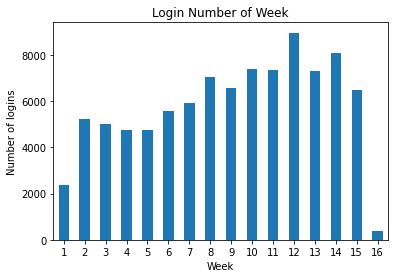

In [16]:
# bar graph showing Login Numbers for the weeks
df1.groupby('week')['count'].sum().plot(kind='bar')
plt.title("Login Number of Week")
plt.xlabel("Week")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Week 12 had the best number of logins while week 16 had a drastic drop

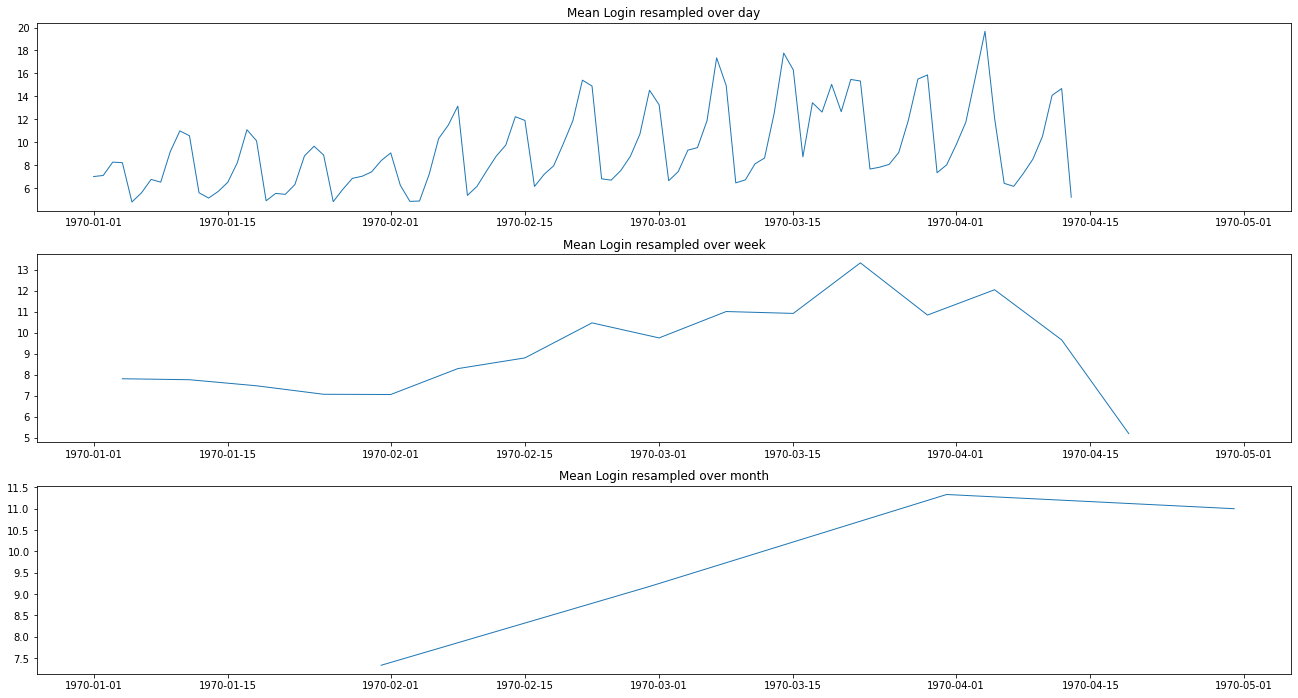

In [17]:
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(5,1,1)
ax1.plot(df1['count'].resample('D').mean(),linewidth=1)
ax1.set_title('Mean Login resampled over day')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(df1['count'].resample('W').mean(),linewidth=1)
ax2.set_title('Mean Login resampled over week')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(df1['count'].resample('M').mean(),linewidth=1)
ax3.set_title('Mean Login resampled over month')
ax3.tick_params(axis='both', which='major')
plt.tight_layout()
plt.show();

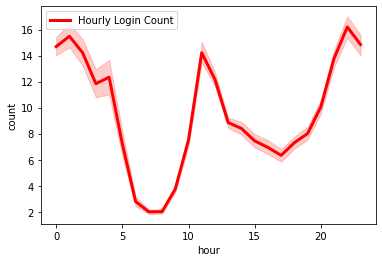

In [18]:
sns.lineplot(
    x='hour',
    y='count',
    linewidth=3,
    data= df1,
    label='Hourly Login Count',
    color='r')

In [19]:
df1_h['TOD']= pd.to_datetime(df1_h.index)
df1_h['hour']= df1_h.TOD.dt.hour
df1_h= df1_h[['count', 'TOD', 'hour']]
df1_h.head()

,count,TOD,hour
login_time,,,
1970-01-01 20:00:00,24,1970-01-01 20:00:00,20
1970-01-01 21:00:00,9,1970-01-01 21:00:00,21
1970-01-01 22:00:00,21,1970-01-01 22:00:00,22
1970-01-01 23:00:00,58,1970-01-01 23:00:00,23
1970-01-02 00:00:00,53,1970-01-02 00:00:00,0


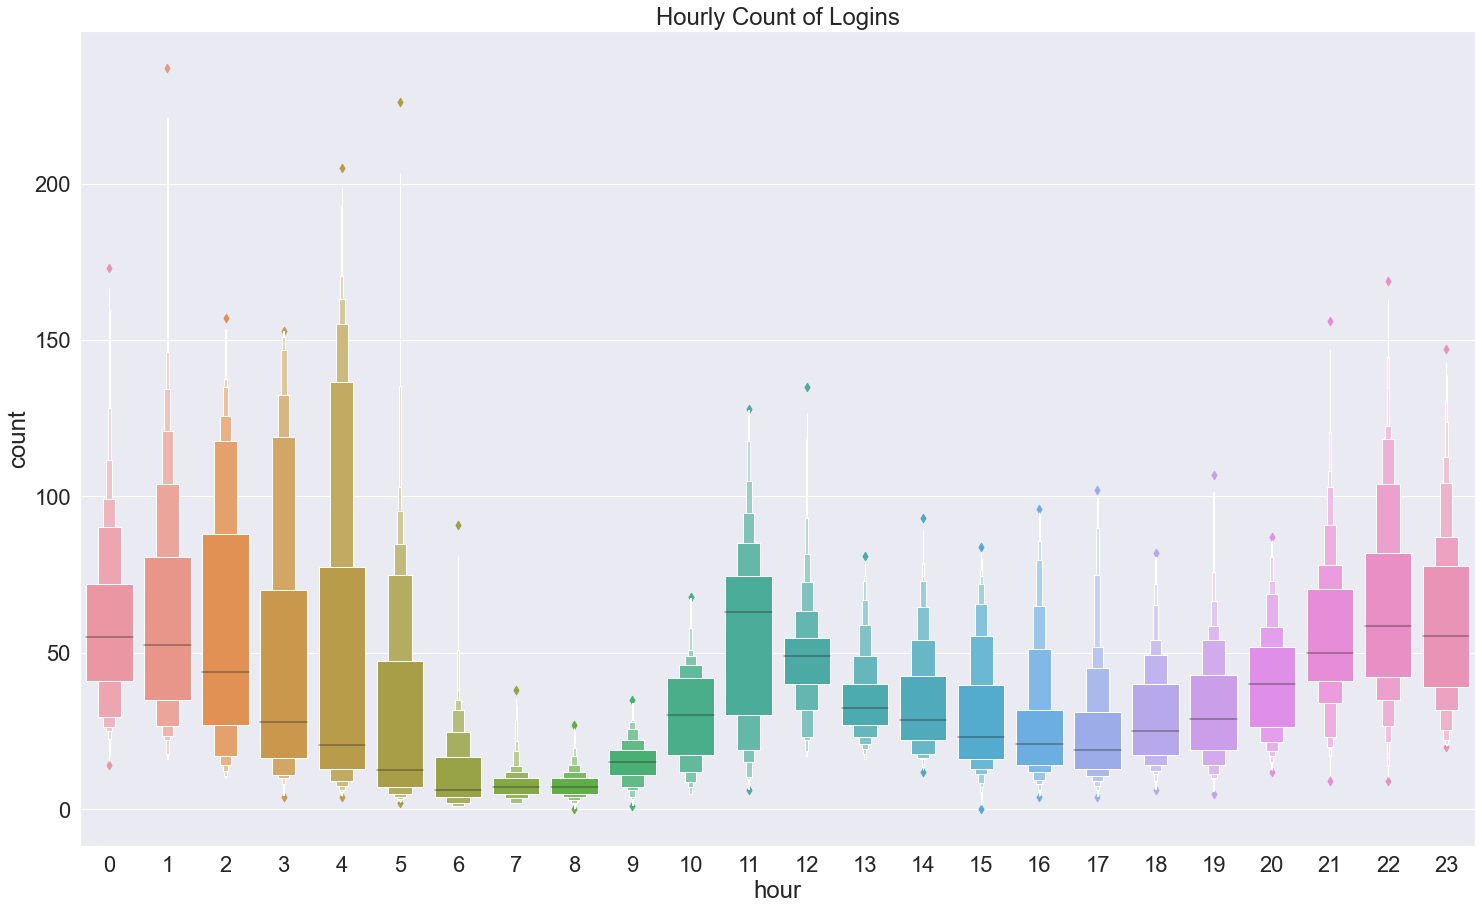

In [20]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
sns.boxenplot(df1_h['hour'], df1_h['count']).set_title('Hourly Count of Logins');

In [21]:
df1_d['date']= pd.to_datetime(df1_d.index)
df1_d['weekday']= df1_d.date.dt.weekday
df1_d = df1_d[['count', 'date', 'weekday']]
df1_d.head()

,count,date,weekday
login_time,,,
1970-01-01,112,1970-01-01,3
1970-01-02,681,1970-01-02,4
1970-01-03,793,1970-01-03,5
1970-01-04,788,1970-01-04,6
1970-01-05,459,1970-01-05,0


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

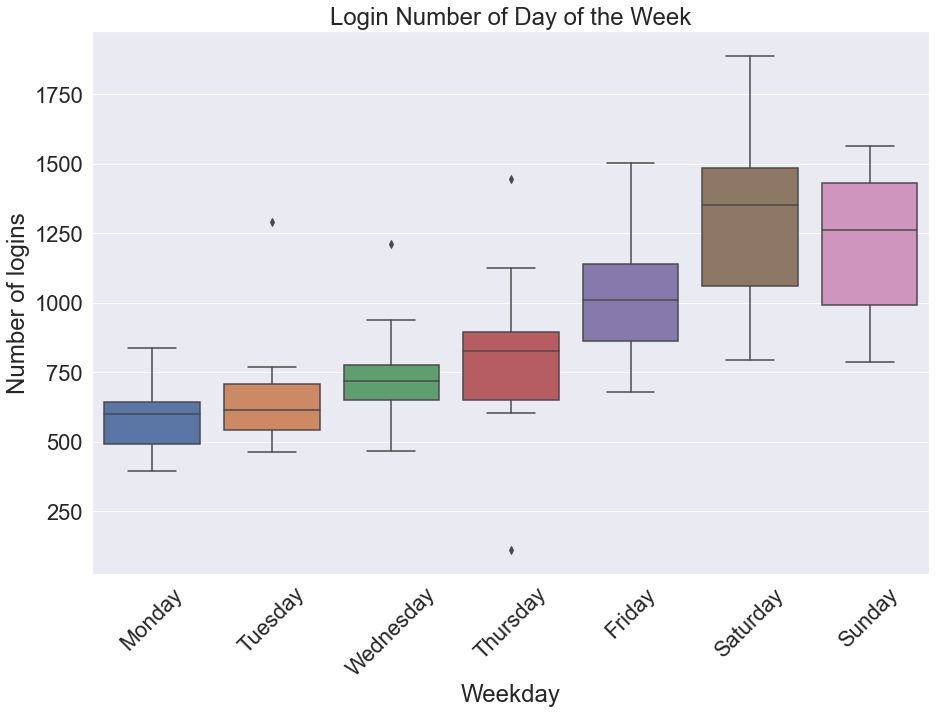

In [22]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='weekday', y='count', data=df1_d)
plt.title("Login Number of Day of the Week")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

In [23]:
df1_w['date']= pd.to_datetime(df1_w.index)
df1_w['week']= df1_w.date.dt.week
df1_w = df1_w[['count', 'date', 'week']]
df1_w.head()

,count,date,week
login_time,,,
1970-01-04,2374,1970-01-04,1
1970-01-11,5217,1970-01-11,2
1970-01-18,5023,1970-01-18,3
1970-01-25,4751,1970-01-25,4
1970-02-01,4744,1970-02-01,5


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

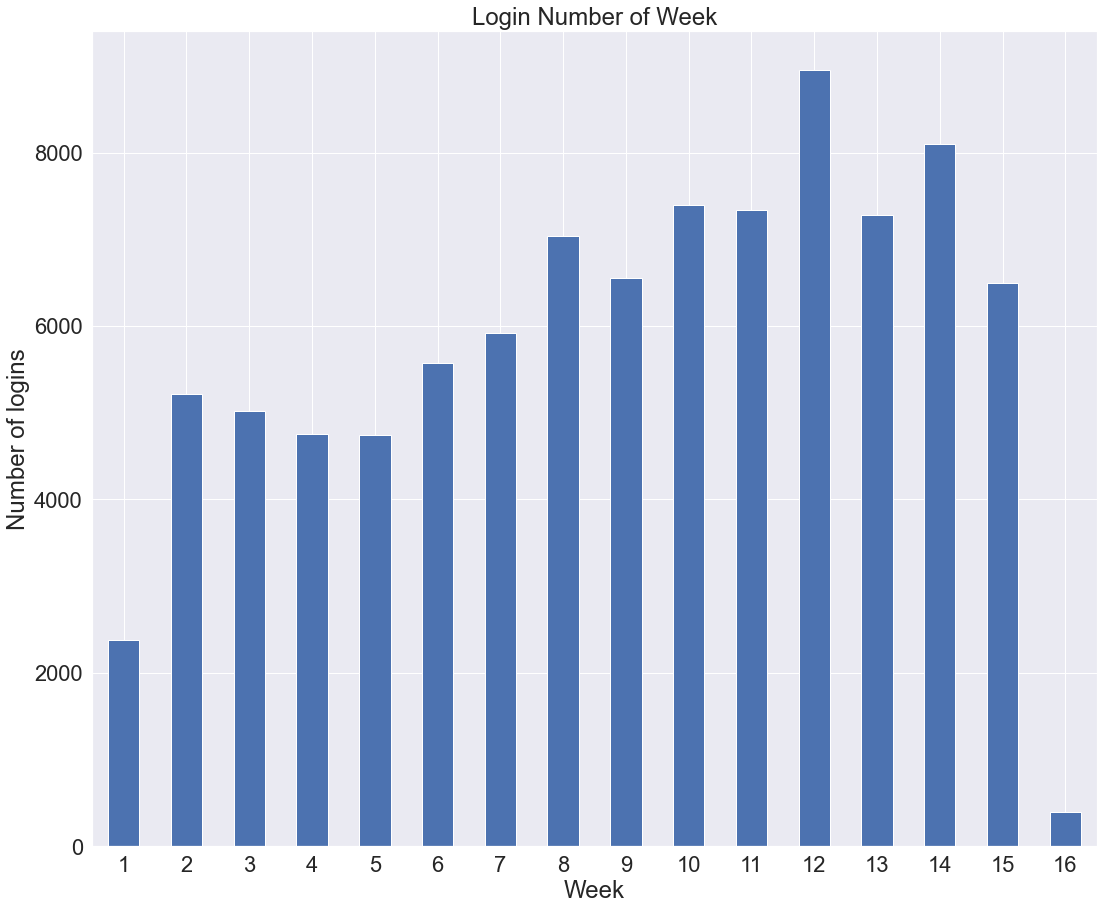

In [24]:
df1_w.groupby('week')['count'].sum().plot(kind='bar', figsize=(18,15))
plt.title("Login Number of Week")
plt.xlabel("Week")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

In [25]:
df1_m['date']= pd.to_datetime(df1_m.index)
df1_m['weekday']= df1_m.date.dt.month
df1_m = df1_m[['count', 'date', 'weekday']]
df1_m.head()

,count,date,weekday
login_time,,,
1970-01-31,21239,1970-01-31,1
1970-02-28,24673,1970-02-28,2
1970-03-31,33723,1970-03-31,3
1970-04-30,13507,1970-04-30,4


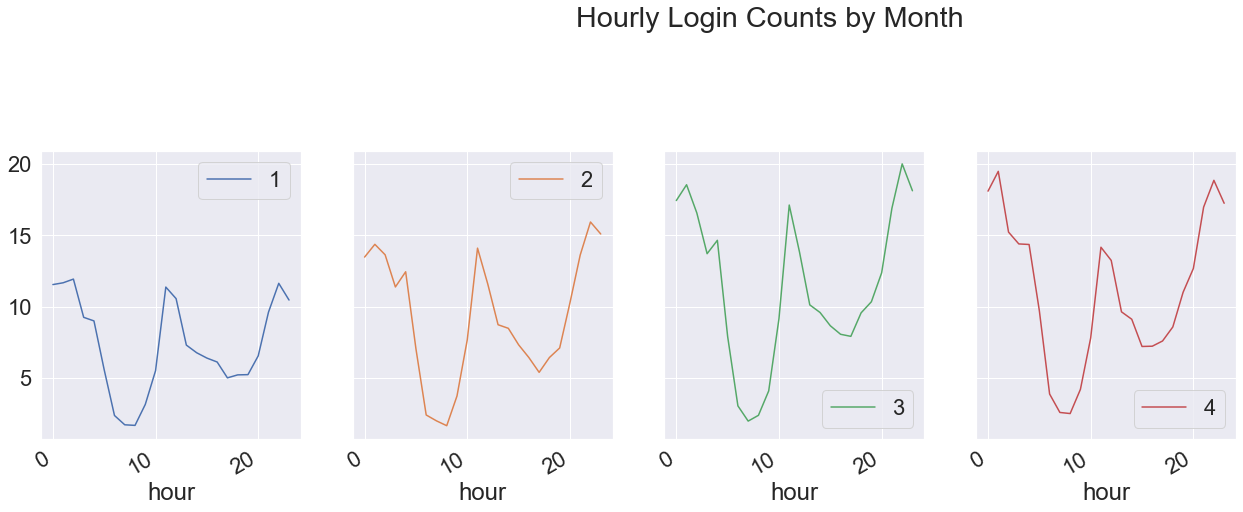

In [26]:
pd.pivot_table(df1.loc[df1['month'] >= 1], values = 'count', 
               columns = "month", index = "hour").plot(subplots= True, figsize=(27, 20), layout=(3, 5), sharey=True, title='Hourly Login Counts by Month');

In [27]:
# Groupby month
print (df1.groupby('month')['count'].aggregate(np.sum))

month
1    21239
2    24673
3    33723
4    13507
Name: count, dtype: int64


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

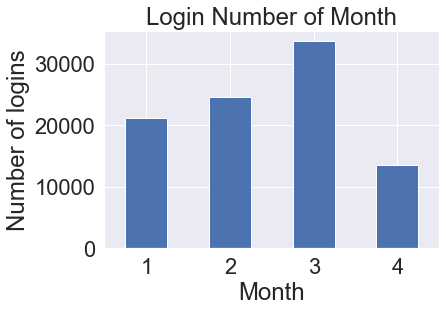

In [28]:
# bar graph showing Login Number for months
df1.groupby('month')['count'].sum().plot(kind='bar')
plt.title("Login Number of Month")
plt.xlabel("Month")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Our visuals are interesting especially when looking at our graph regarding hours of the day. Most of the logins occur during the night time into very early morning hours but then had a huge drop off during the hours most people are waking up and getting ready for school/work or whatever their day may be. Noontime logins increased before settling back down until the later evening hours. 

Monthly the logins increased each month with a big drop off in April but that is due to our data cutting off midway through the month.

Daily logins increase through the week with Monday having the lowest logins and the weekend having the most.

Weekly logins flucuated a bit over the 16 weeks of data that we have. Week 12 had our most logins while our 1st week had the fewest. The last week is when our data cut off.

# Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

b. what statistical test(s) you will conduct to verify the significance of the
observation

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


## Solution

Toll costs driver partners in both citys reimbursed and the percentage of the reimbursed costs by total toll costs incharged as the key measure of success of this experiment. If the toll costs of driver parterns reimbursed increase, it indicates that more driver partners went to another city. If the percentage of the reimbursed costs by total toll costs incharged increase, it shows that more activities between two cities are taken by driver parterns. The bigger the costs reimbursed and percentage are, the more success this experiment is.

The implemention I would choose for this experiment would be by collecting the data of the toll costs reimbursed, include date, time, cost, direction, driver partners from which city, toll costs in charged. Then aggregate and analyze the data to find out the trend. If the costs reimbursed and percentage are increasing,

Conduct significance tests to verify the significance of the observation.

Visualize the experiment with the results of the trend, weekday, time of a day, direction, percentages. Then prepare a presentation to provide recommendations to the city operations team.

# Part 3: Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

## Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [29]:
# read dataset and save as a DataFrame
with open ('ultimate_data_challenge.json', 'r') as f:
    df= json.load(f)

df= pd.DataFrame(df)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [31]:
#convert date to datetime
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date']= pd.to_datetime(df['signup_date'])

#convert boolean column into int
df['ultimate_black_user'] = df['ultimate_black_user'].astype(int)

In [32]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

city - 0.0%
trips_in_first_30_days - 0.0%
signup_date - 0.0%
avg_rating_of_driver - 16.0%
avg_surge - 0.0%
last_trip_date - 0.0%
phone - 1.0%
surge_pct - 0.0%
ultimate_black_user - 0.0%
weekday_pct - 0.0%
avg_dist - 0.0%
avg_rating_by_driver - 0.0%


In [33]:
# Fill in missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)

#drop rows with remaining missing data
df.dropna(axis=0, inplace=True)

In [34]:
#Now that we've cleaned up our dataset we can take another look at the dataset
def ames_eda(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['std'] = df.std()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    return pd.DataFrame(eda_df)

ames_eda(df)

,null_sum,null_pct,dtypes,count,mean,median,std,min,max
avg_dist,0,0.0,float64,49604,5.785418,3.88,5.669709,0,160.96
avg_rating_by_driver,0,0.0,float64,49604,4.777862,5.00,0.446220,1,5
avg_rating_of_driver,0,0.0,float64,49604,4.601482,4.70,0.565227,1,5
avg_surge,0,0.0,float64,49604,1.074991,1.00,0.222666,1,8
city,0,0.0,object,49604,NaN,NaN,NaN,Astapor,Winterfell
last_trip_date,0,0.0,datetime64[ns],49604,NaN,NaN,NaN,2014-01-01 00:00:00,2014-07-01 00:00:00
phone,0,0.0,object,49604,NaN,NaN,NaN,Android,iPhone
signup_date,0,0.0,datetime64[ns],49604,NaN,NaN,NaN,2014-01-01 00:00:00,2014-01-31 00:00:00
surge_pct,0,0.0,float64,49604,8.875314,0.00,19.989018,0,100
trips_in_first_30_days,0,0.0,int64,49604,2.277256,1.00,3.793300,0,125


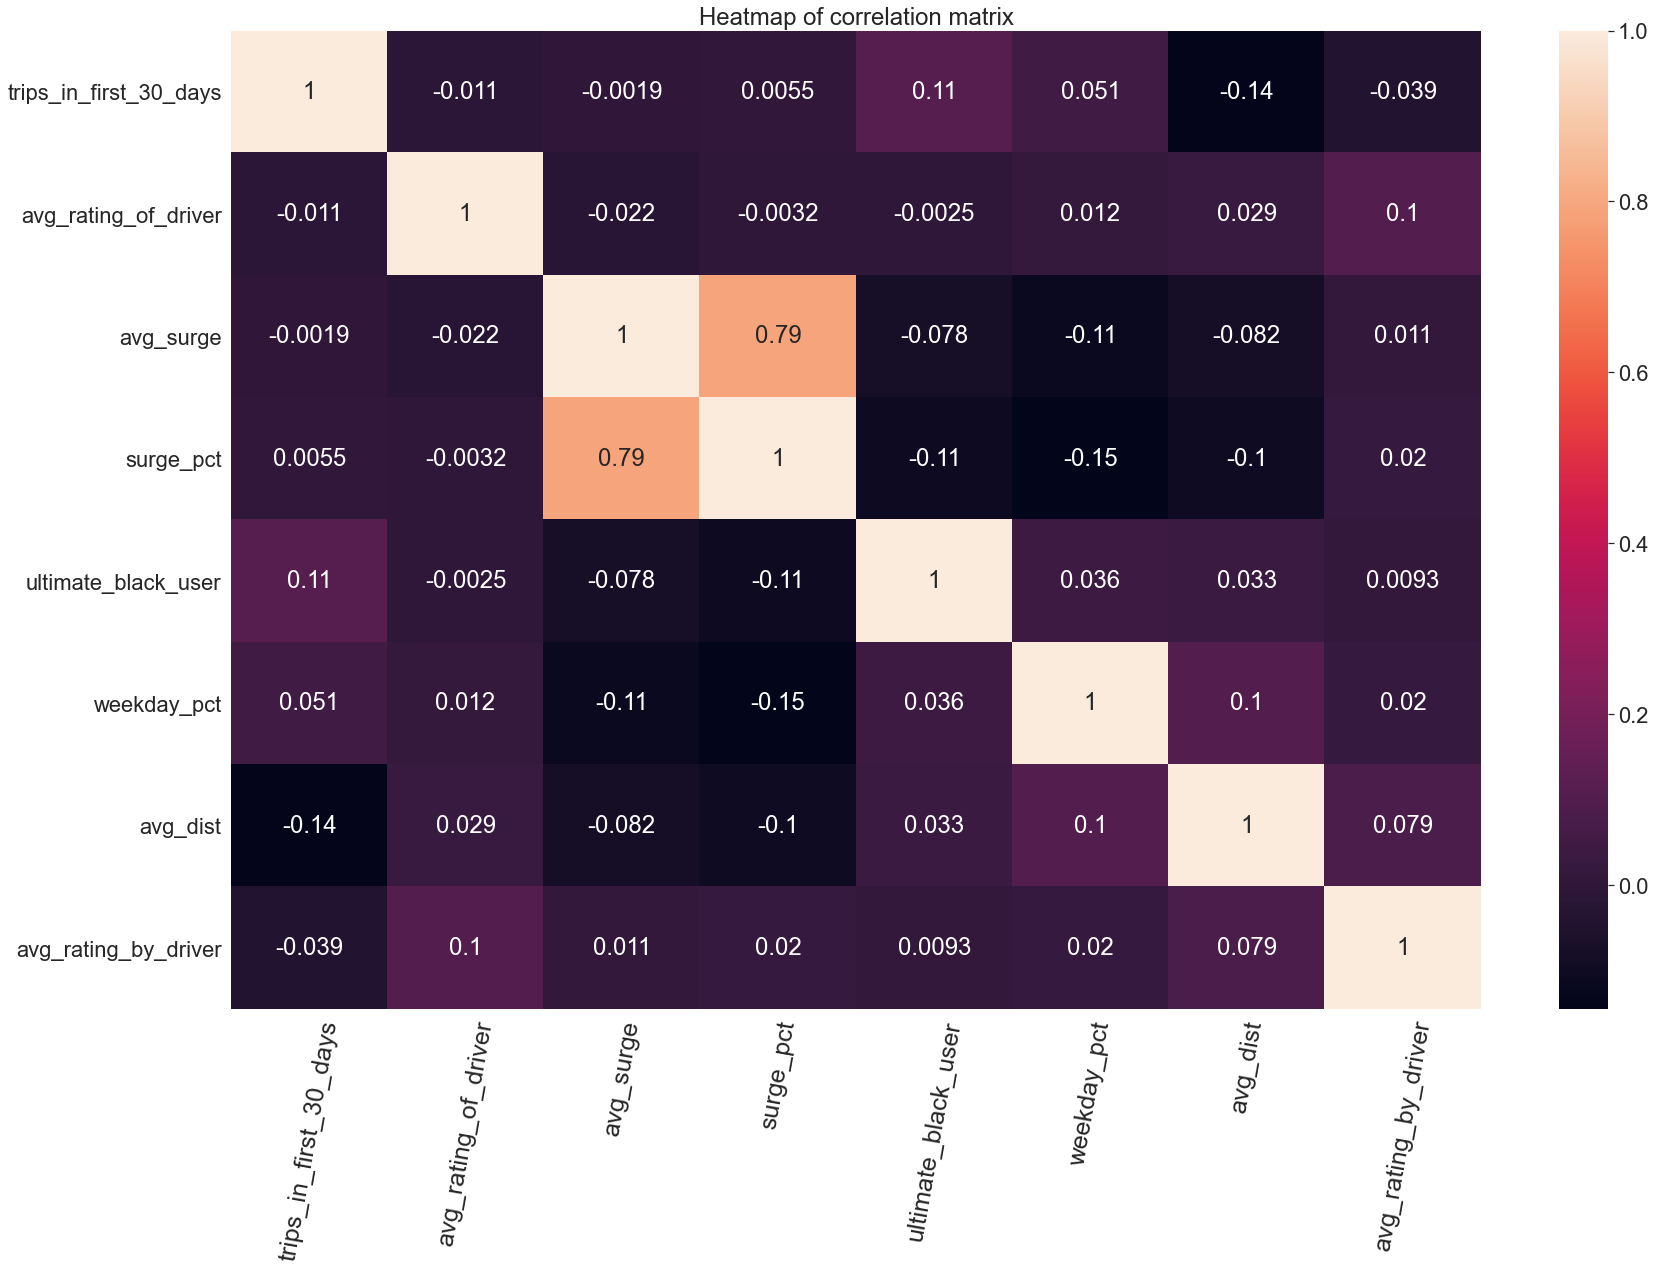

In [35]:
#Heatmap of correlation matrix of our yearly averages
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(28,18))
sns.heatmap(correlation_matrix, annot=True, ax=ax)
plt.xticks(rotation=80, fontsize=25)
plt.title('Heatmap of correlation matrix')
plt.show()

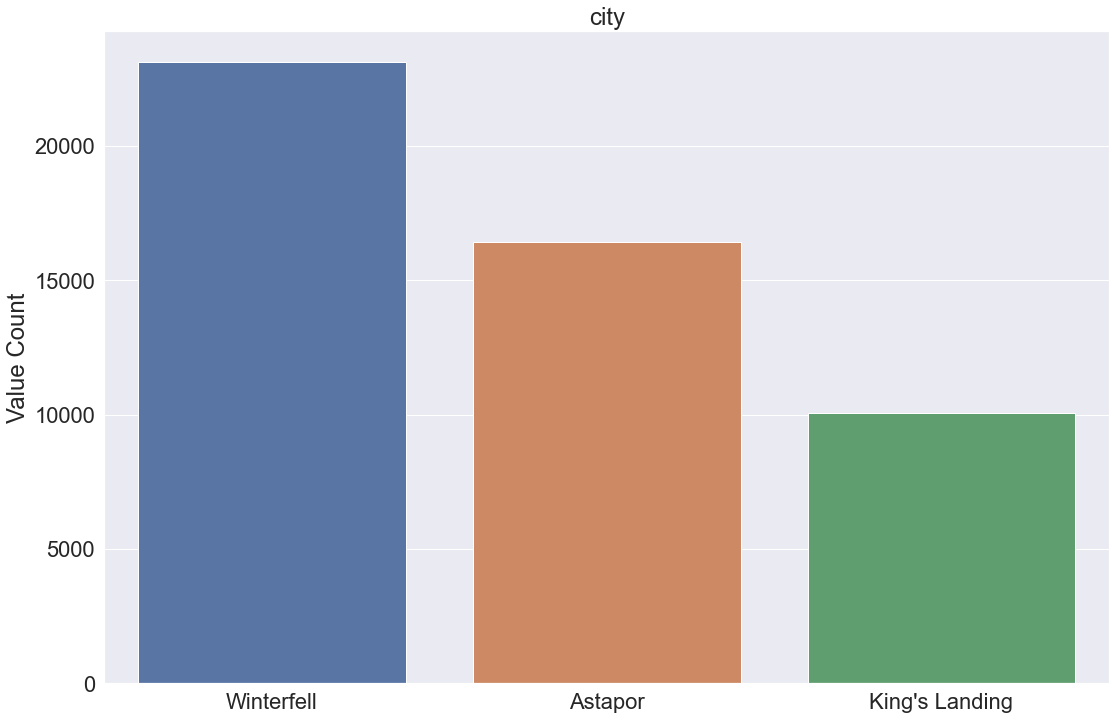

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64


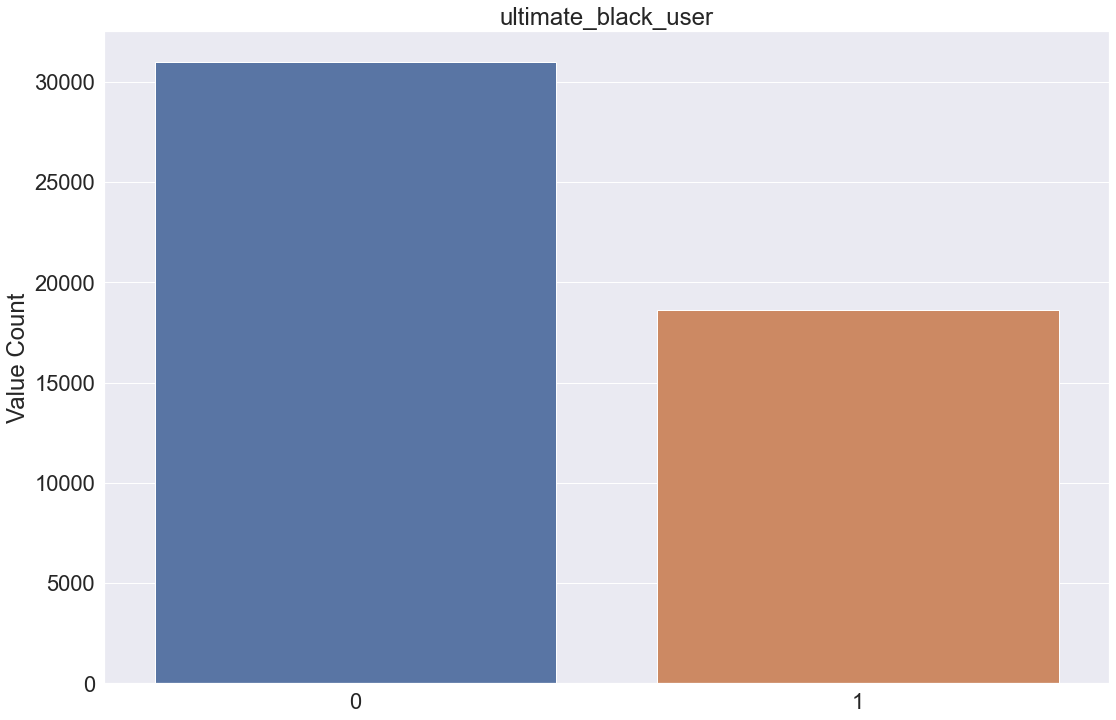

0    30992
1    18612
Name: ultimate_black_user, dtype: int64


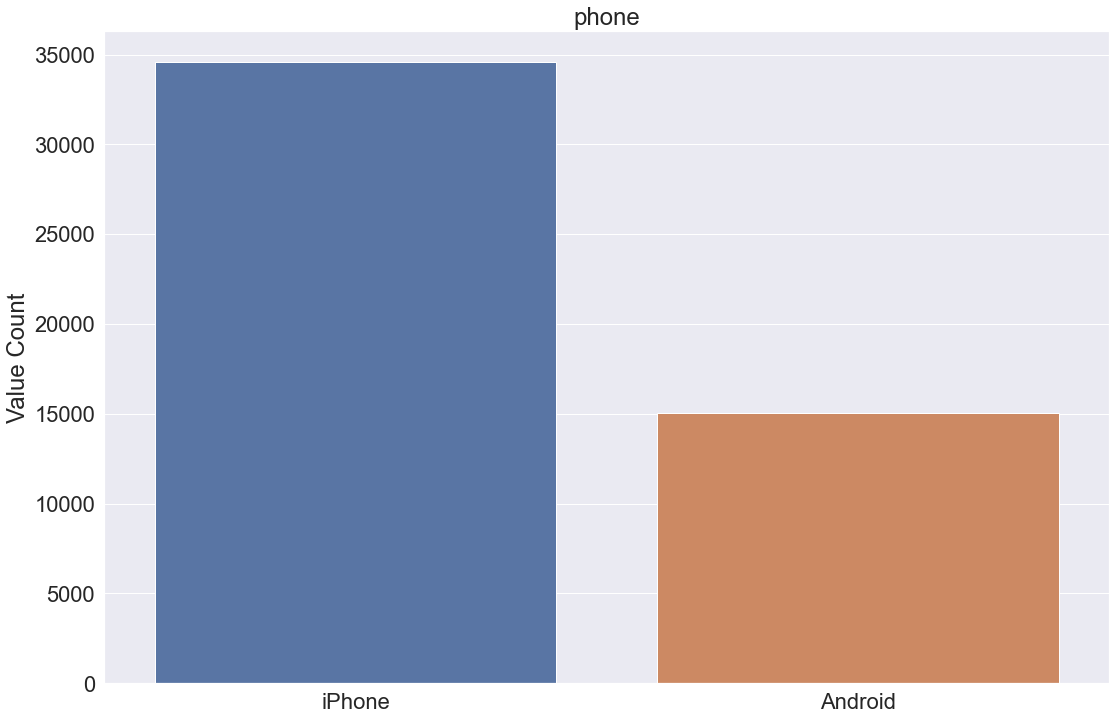

iPhone     34582
Android    15022
Name: phone, dtype: int64


In [36]:
#create categorical values of features
features = ['city', 'ultimate_black_user', 'phone']

#barplot to visualize value counts per city
for feature in features:
    plt.figure(figsize=(18,12)),
    sns.set(font_scale=2)
    sns.barplot(x = list(df[feature].value_counts().index), y = df[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Value Count')
    plt.show()
    print(df[feature].value_counts())

In [37]:
# Calculate if a user is retained in the 6th month.
df['retained'] = df['last_trip_date']>=pd.to_datetime('2014-06-01')

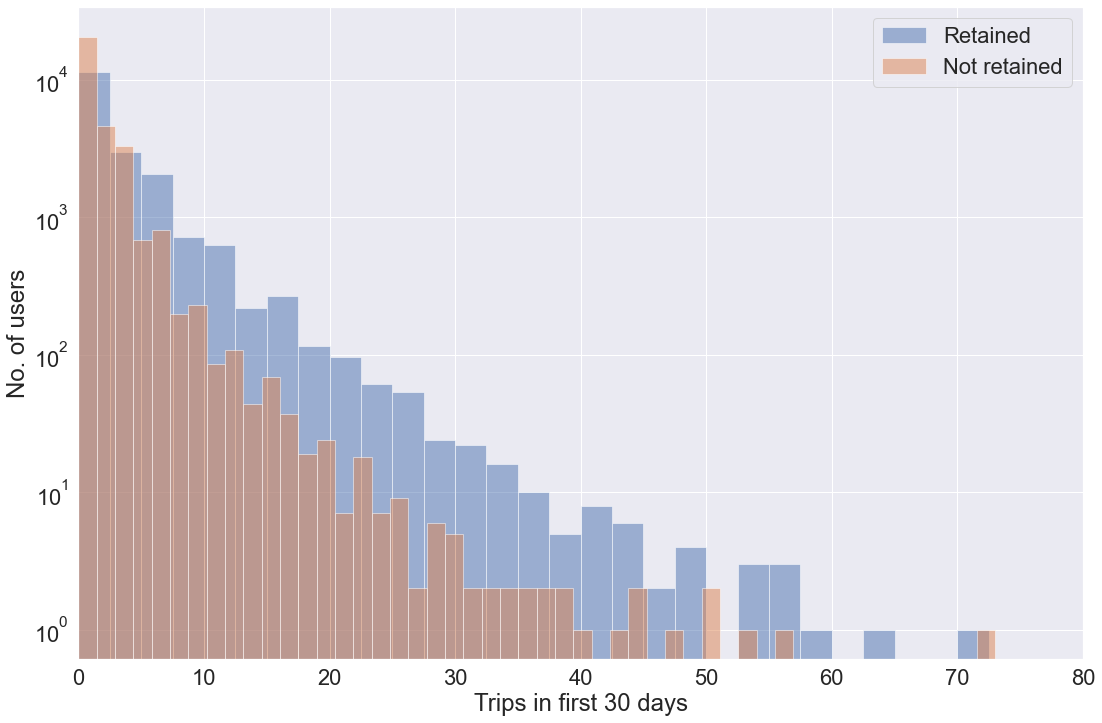

In [38]:
# Visualize some of them.
retained = df.loc[df.retained==1]
not_retained = df.loc[df.retained==0]
_ = plt.figure(figsize=(18,12))
_ = plt.hist(retained['trips_in_first_30_days'], bins=50, alpha=0.5, label='Retained')
_ = plt.hist(not_retained['trips_in_first_30_days'], bins=50, alpha=0.5, label='Not retained')
_ = plt.xlabel('Trips in first 30 days')
_ = plt.ylabel('No. of users')
_ = plt.xlim([0,80])
_ = plt.yscale('log')
_ = plt.legend()

([<matplotlib.axis.XTick at 0x28daaa0fe48>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

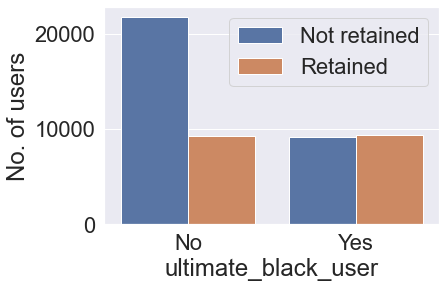

In [39]:
sns.countplot(x='ultimate_black_user', hue='retained', data=df)
plt.legend(['Not retained', 'Retained'])
plt.ylabel('No. of users')
plt.xticks([0,1],['No','Yes'])

Text(0, 0.5, 'No. of users')

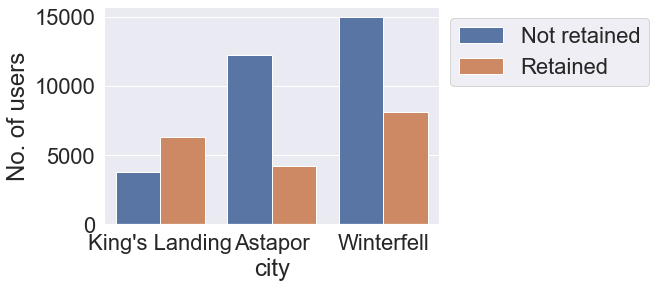

In [40]:
# Visualize the two categorical features, city and phone
sns.countplot(x='city', hue='retained', data=df)
plt.legend(['Not retained', 'Retained'], bbox_to_anchor=(1,1))
plt.ylabel('No. of users')

In [41]:
# Show distributions of numerical features
numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

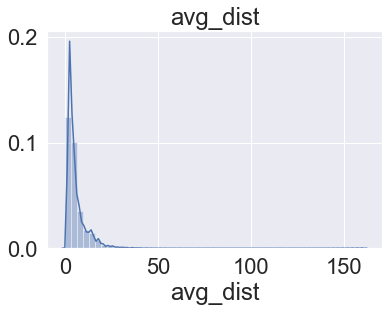

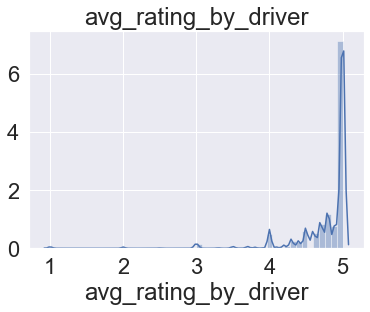

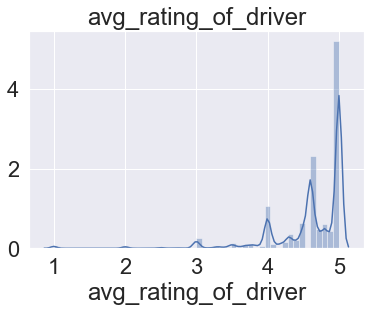

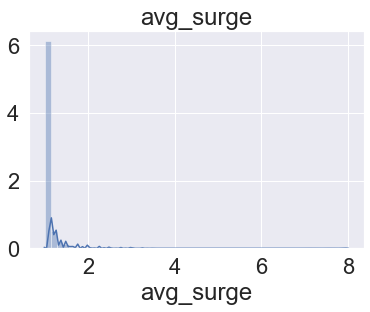

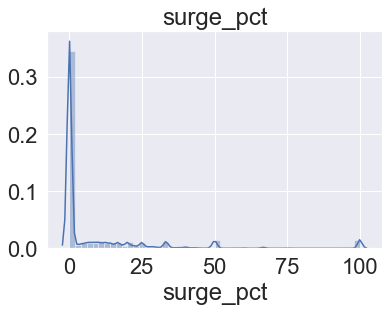

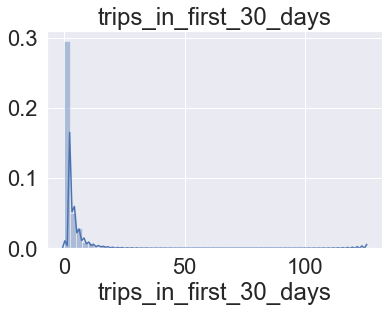

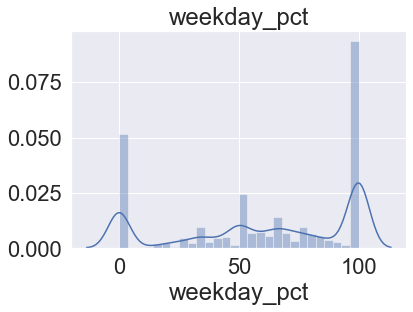

In [42]:
for feature in numerical_features:
    sns.distplot(df[feature])
    plt.title(feature)
    plt.show();

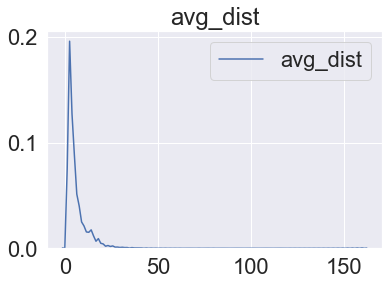

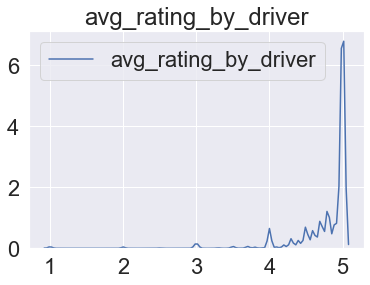

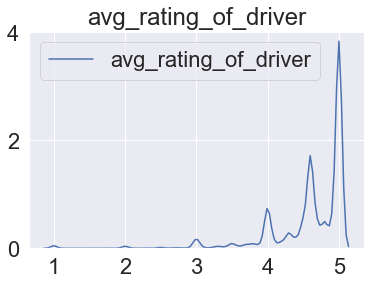

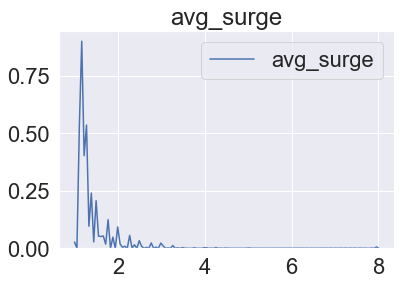

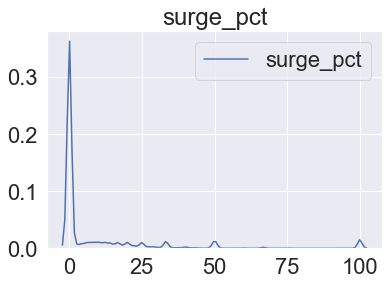

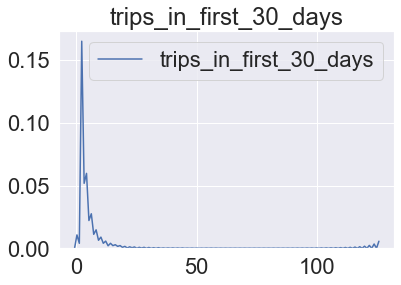

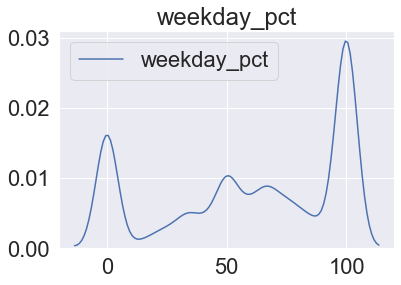

In [43]:
for feature in numerical_features:
    sns.kdeplot(df[feature])
    plt.title(feature)
    plt.show();

In [44]:
# See how many users were retained.
print('Out of {} users, {} were still active in their 6th month.'
     .format(len(df), df['retained'].sum()))

Out of 49604 users, 18671 were still active in their 6th month.


## Machine Learning

In [45]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

## Random Forest Classifier

In [46]:
#create get_dummies for our non numerical values
df_dum = pd.get_dummies(df, drop_first=True)

df_dum.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)
df_dum.head(2)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_iPhone
0,4,4.7,1.1,15.4,1,46.2,3.67,5.0,True,1,0,1
1,0,5.0,1.0,0.0,0,50.0,8.26,5.0,False,0,0,0


In [47]:
X = df_dum.drop('retained', axis=1)
y = df_dum['retained']

In [48]:
# Create training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39683, 11)
(9921, 11)
(39683,)
(9921,)


In [50]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [51]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [52]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

# standardize the features
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [53]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 23)

#fit the model
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)

In [54]:
#predict our model
y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[5015, 1169],
       [1250, 2487]], dtype=int64)

In [55]:
#create list of X columns
feature_list = list(X.columns)

# Get numerical feature importances
importances = list(clf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: avg_dist             Importance: 0.3
Variable: weekday_pct          Importance: 0.13
Variable: avg_rating_by_driver Importance: 0.12
Variable: surge_pct            Importance: 0.09
Variable: trips_in_first_30_days Importance: 0.08
Variable: avg_rating_of_driver Importance: 0.08
Variable: avg_surge            Importance: 0.07
Variable: city_King's Landing  Importance: 0.06
Variable: phone_iPhone         Importance: 0.04
Variable: ultimate_black_user  Importance: 0.03
Variable: city_Winterfell      Importance: 0.02


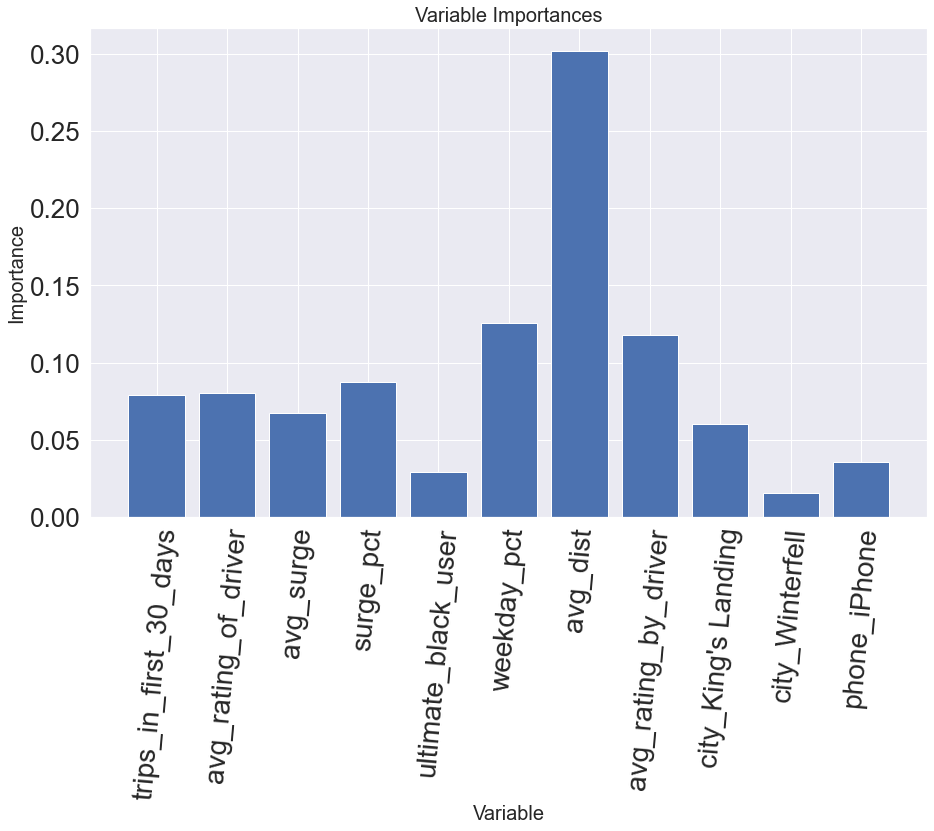

In [56]:
# list of x locations for plotting
x_values = list(range(len(importances)))
#chart size
plt.figure(figsize=(15,9))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation=85, fontsize=28);plt.yticks(fontsize=26)
# Axis labels and title
plt.ylabel('Importance', fontsize=20); plt.xlabel('Variable', fontsize=20); plt.title('Variable Importances', fontsize=20);

In [57]:
rf_score = clf.score(X_test, y_test)
print('Model Accuracy: {}'.format(rf_score))

Model Accuracy: 0.7561737728051607


In [58]:
# standardize X for k-fold cross validation later
std_X = StandardScaler().fit_transform(X)

kfold = KFold(n_splits=5, random_state=15)
results = cross_val_score(clf, std_X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

rf_score = results.mean()

C:\Users\Jimsyd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 75.64% (0.41%)


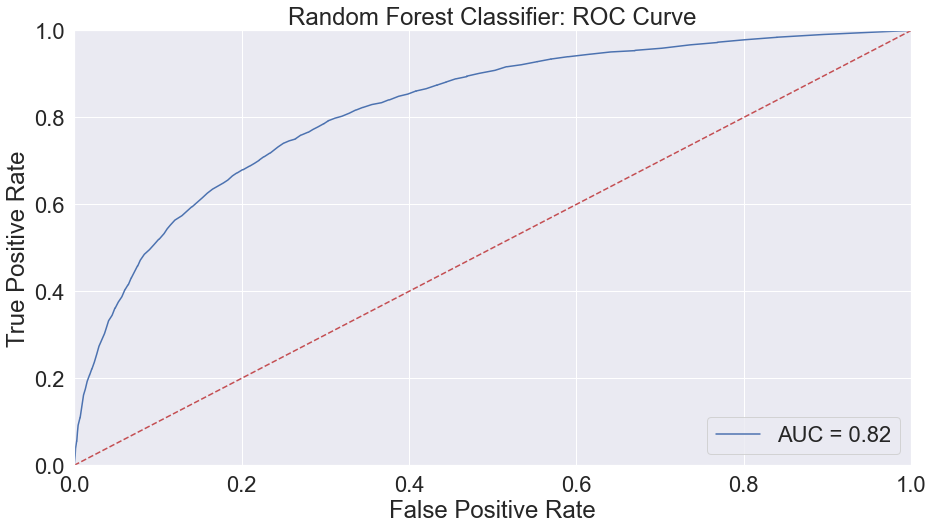

In [59]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(15,8))
plt.title('Random Forest Classifier: ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
#Compute the AUC score
print('AUC: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

AUC: 0.7382


## Suggestions/Conclusion

To improve long term rider retention, Ultimate should focus on the top feature influencers of our model:

1. avg_dist - Average distance(miles) per trip taken in the 1st 30 days after signup

2. weekday_pct - Percentage of the user's trips occurring during the weekday

3. Average Rating by driver - Riders with ~ 4.95 ratings tended to retain more. These people may not be using the service as often which allows them to obtain a higher score.

### Future

Ultimate may need to focus on persuading riders to take trips on days other than the weekend. They should look into their service offerings as well so as to obtain higher scores for their riders. Finally, they should work more on finding ways to convience the riders to use the service more often, especially  with convincing them to take longer riders.